# Prediksi Stunting Menggunakan Deep Learning
Dataset dari Kaggle: Faktor Stunting

## Overview
Notebook ini berisi implementasi model deep learning untuk memprediksi stunting pada anak berdasarkan berbagai faktor seperti jenis kelamin, usia, berat badan lahir, dll.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import joblib
from joblib import dump
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Download dan load dataset
!curl -L -o faktor-stunting.zip https://www.kaggle.com/api/v1/datasets/download/harnelia/faktor-stunting
!unzip faktor-stunting.zip

# Load dataset
df = pd.read_csv('Stunting_Dataset.csv')
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 45433  100 45433    0     0  37703      0  0:00:01  0:00:01 --:--:-- 37703
Archive:  faktor-stunting.zip
  inflating: Stunting_Dataset.csv    


,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


## Analisis Data
Mari kita lihat karakteristik data yang kita miliki

In [ ]:
# Info dasar dataset
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB
None

Statistik Deskriptif:
                Age  Birth Weight  Birth Length   Body Weight  Body Length
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000
mean      14.255000      2.757600     49.117400      7.631990     68.85492
std        7.923285      0.291092      0.439814      1.720461      8.90664
min        6.000000      2.000000     48.000000

Missing Values:
Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64


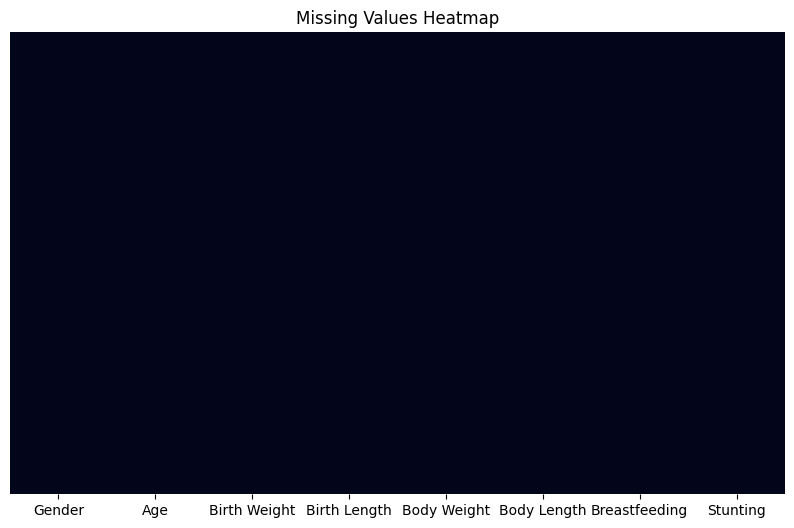

In [ ]:
# Cek missing values
print("Missing Values:")
print(df.isnull().sum())

# Visualisasi missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Data Preprocessing

In [ ]:
# Encoding variabel kategorikal
le = LabelEncoder()
df['Stunting'] = le.fit_transform(df['Stunting'])
df['Gender'] = le.fit_transform(df['Gender'])
# Cek data yang duplikat
duplikat = df[df.duplicated()]

# Menampilkan data duplikat
print(duplikat)

# Cek jumlah data duplikat
print(f"Jumlah data duplikat: {len(duplikat)}")

# Hapus data duplikat
df = df.drop_duplicates()

df = df.drop(columns=['Breastfeeding'])

      Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
76         1   13           2.9            49          9.0         69.0   
121        1    6           2.3            50          6.4         68.3   
147        1    6           2.3            50          6.4         68.3   
207        1   15           2.9            49          9.0         69.0   
317        1   13           2.3            50          6.4         68.3   
...      ...  ...           ...           ...          ...          ...   
9985       1    7           2.3            50          6.4         68.3   
9989       0    9           3.0            49          7.1         65.0   
9993       1   12           2.3            49          9.0         69.0   
9995       1   15           3.0            49          9.0         63.0   
9998       1   14           2.8            49         10.0         69.0   

     Breastfeeding  Stunting  
76              No         1  
121             No         0  
147   

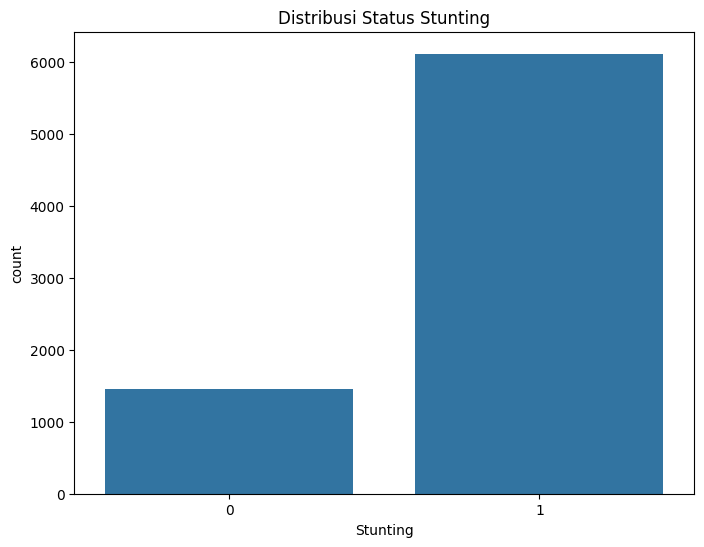

In [ ]:
# Visualisasi distribusi status stunting
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Stunting')
plt.title('Distribusi Status Stunting')
plt.show()

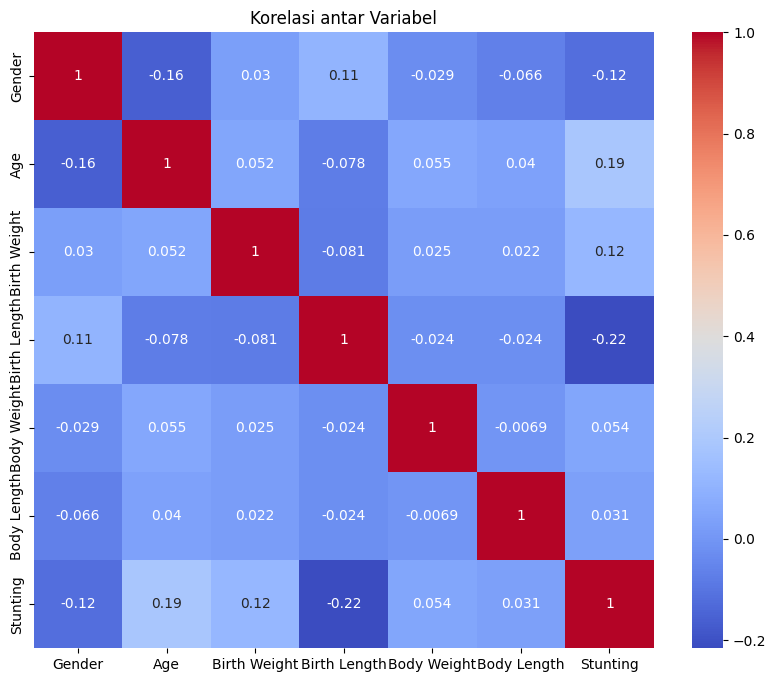

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.show()

In [ ]:
# Split fitur dan target
X = df.drop(columns=['Stunting'])
y = df['Stunting']

# Split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kolom yang perlu di-scale
features_to_scale = ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling hanya pada fitur yang relevan
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Simpan scaler ke file
joblib.dump(scaler, 'scaler.pkl')

# Tampilkan beberapa baris untuk memastikan scaling berjalan dengan baik
print(X_train.head())


      Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length
8632       1 -0.104915     -2.582493     -0.208916    -0.800824    -0.425674
338        1 -0.569771      0.796428     -0.208916     0.499226     2.492520
5476       1 -0.337343      0.796428     -0.208916    -0.800824    -0.425674
2141       1 -0.221129      0.796428      2.092203     0.499226    -0.078019
5050       1 -0.221129      1.134320     -0.208916     0.781846     0.733175


## Model Development

In [ ]:
# Membangun model neural network
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training model
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7626 - loss: 0.5400 - val_accuracy: 0.8168 - val_loss: 0.4170
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.4266 - val_accuracy: 0.8193 - val_loss: 0.4168
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8136 - loss: 0.4480 - val_accuracy: 0.8168 - val_loss: 0.4101
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8142 - loss: 0.4354 - val_accuracy: 0.8185 - val_loss: 0.4094
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8212 - loss: 0.4214 - val_accuracy: 0.8234 - val_loss: 0.4102
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8310 - loss: 0.4122 - val_accuracy: 0.8243 - val_loss: 0.4115
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8169 - loss: 0.4241 - val_accuracy: 0.8185 - val_loss: 0.4117
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8304 - loss: 0.3935 - val_accuracy: 0.8218 - v

## Model Evaluation

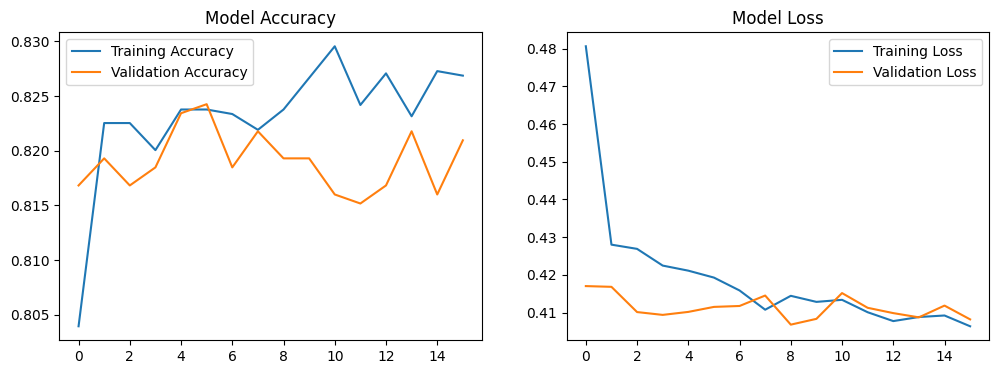

In [ ]:
# Plot accuracy dan loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8311 - loss: 0.3978

Test Accuracy: 0.8383
Test Loss: 0.4010
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


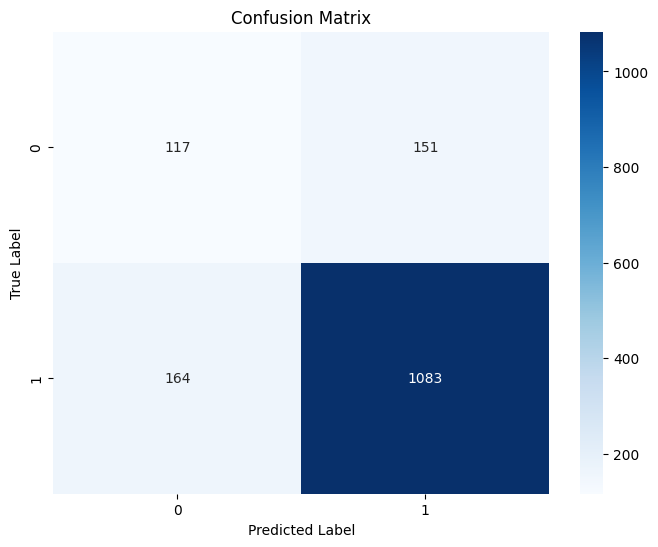


Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.44      0.43       268
           1       0.88      0.87      0.87      1247

    accuracy                           0.79      1515
   macro avg       0.65      0.65      0.65      1515
weighted avg       0.80      0.79      0.79      1515



In [ ]:
# Evaluasi pada data test
from sklearn.metrics import confusion_matrix, classification_report

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Confusion Matrix dan Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Save Model

In [ ]:
# Save model dalam format H5
model.save('stunting_model.h5')
print("Model saved as stunting_model.h5")

Model saved as stunting_model.h5


In [ ]:
# Convert dan save model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('stunting_model.tflite', 'wb') as f:
    f.write(tflite_model)
print("Model converted and saved as stunting_model.tflite")

Saved artifact at '/tmp/tmp3d66mt8q'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_92')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136953253720864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252547392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252549856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252552320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252555136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252556192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252552672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252558304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252559712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136953252560416: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted and sav

##contoh prediksi

In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Data untuk anak stunting
data_stunting = {
    "Gender": [1, 0, 1, 1],
    "Age": [24, 36, 30, 18],
    "Birth Weight": [2.5, 2.7, 2.4, 2.6],
    "Birth Length": [49, 50, 48, 49],
    "Body Weight": [6.5, 8.0, 7.0, 6.0],
    "Body Length": [70, 75, 72, 68],
}

# Data untuk anak tidak stunting
data_tidak_stunting = {
    "Gender": [1, 0, 0, 1],
    "Age": [36, 18, 12, 24],
    "Birth Weight": [3.0, 3.2, 3.1, 3.0],
    "Birth Length": [50, 51, 50, 51],
    "Body Weight": [9.0, 8.5, 8.2, 8.8],
    "Body Length": [80, 78, 76, 79],
}

# Membuat dataframe untuk masing-masing
df_stunting = pd.DataFrame(data_stunting)
df_tidak_stunting = pd.DataFrame(data_tidak_stunting)

# Gabungkan kedua dataframe
df = pd.concat([df_stunting, df_tidak_stunting], ignore_index=True)

# Tampilkan dataframe
print("Data anak stunting dan tidak stunting:")
print(df)

# Memuat scaler yang sudah disimpan
scaler = joblib.load('scaler.pkl')

# Melakukan scaling pada fitur yang relevan (kecuali Gender)
features_to_scale = ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']
df[features_to_scale] = scaler.transform(df[features_to_scale])

# Memuat model yang sudah disimpan
model = load_model('stunting_model.h5')

# Prediksi menggunakan model
predictions = model.predict(df)

# Menambahkan hasil prediksi ke DataFrame
df['Prediksi Stunting'] = ["Stunting" if pred < 0.7 else "Tidak Stunting" for pred in predictions]

# Menampilkan DataFrame dengan prediksi
print("\nData dengan Prediksi Stunting:")
print(df[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Prediksi Stunting']])


Data anak stunting dan tidak stunting:
   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length
0       1   24           2.5            49          6.5           70
1       0   36           2.7            50          8.0           75
2       1   30           2.4            48          7.0           72
3       1   18           2.6            49          6.0           68
4       1   36           3.0            50          9.0           80
5       0   18           3.2            51          8.5           78
6       0   12           3.1            50          8.2           76
7       1   24           3.0            51          8.8           79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Data dengan Prediksi Stunting:
   Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0       1  1.057225     -0.893033     -0.208916    -0.631252     0.101075   
1       0  2.451793     -0.217248      2.092203     0.216607     0.627825   
2       1  1.754509     -1.230925     -

In [ ]:
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Data untuk anak (1 data)
data_anak = {
    "Gender": [0],  # 1 untuk laki-laki, 0 untuk perempuan
    "Age": [12],  # Usia dalam bulan
    "Birth Weight": [6],  # Berat lahir dalam kilogram
    "Birth Length": [60],  # Panjang lahir dalam cm
    "Body Weight": [10],  # Berat badan saat ini dalam kilogram
    "Body Length": [90],  # Panjang badan saat ini dalam cm
}

# Membuat dataframe untuk anak
df_anak = pd.DataFrame(data_anak)

# Tampilkan data anak
print("Data Anak:")
print(df_anak)

# Memuat scaler yang sudah disimpan
scaler = joblib.load('scaler.pkl')

# Melakukan scaling pada fitur yang relevan (kecuali Gender)
features_to_scale = ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']
df_anak[features_to_scale] = scaler.transform(df_anak[features_to_scale])

# Memuat model yang sudah disimpan
model = load_model('stunting_model.h5')

# Prediksi menggunakan model
predictions = model.predict(df_anak)

# Menambahkan hasil prediksi ke DataFrame
df_anak['Prediksi Stunting'] = ["Stunting" if pred < 0.7 else "Tidak Stunting" for pred in predictions]
# Menambahkan hasil prediksi ke DataFrame
df_anak['angak prediksi'] = [predictions]

# Menampilkan DataFrame dengan prediksi
print("\nData dengan Prediksi Stunting:")
print(df_anak[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Prediksi Stunting', 'angak prediksi']])


Data Anak:
   Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length
0       0   12             6            60           10           90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step

Data dengan Prediksi Stunting:
   Gender       Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0       0 -0.337343     10.933193     25.103393     1.347085     2.208075   

  Prediksi Stunting angak prediksi  
0    Tidak Stunting  [[0.3135923]]  


In [ ]:
# Extract mean and std values
means = scaler.mean_  # Mean of each feature
stds = scaler.scale_  # Std of each feature

print("Mean values:", means)
print("Standard deviation values:", stds)

Mean values: [14.90277319  2.76429515 49.09078904  7.61678772 69.04057445]
Standard deviation values: [8.60481693 0.2959524  0.43457117 1.769163   9.49217264]


## Kesimpulan

1. Model berhasil mencapai akurasi training sekitar 84% dan akurasi validasi 82%
2. Terdapat sedikit overfitting yang ditunjukkan oleh gap antara training dan validation loss
3. Performa model cukup stabil dalam memprediksi stunting
4. Area peningkatan:
   - Pengumpulan lebih banyak data
   - Feature engineering
   - Eksperimen dengan arsitektur model yang berbeda
   - Implementasi teknik regularisasi untuk mengurangi overfitting